In [85]:
import numpy
# import sys
# sys.path.append("/home/wian/Documents/BEng_Hons/Skogestad-Python/")
# import utils
import matplotlib.pyplot as plt
%matplotlib inline

# Plotting Singular Values Across Frequency

In [112]:
Kc = 0.3
def G(s):
    G11 = 4.29 * numpy.exp(-2.6 * s) / ((6.7 * s + 1))
    G12 = -2.38 * numpy.exp(-3.5 * s) / ((8.64 * s + 1))
    G13 = -2.156 * numpy.exp(-s) / ((9.06 * s + 1))
    G21 = 7.215 * numpy.exp(-6.5 * s) / ((3.25 * s + 1))
    G22 = -9.218 * numpy.exp(-3.0 * s) / ((5.0 * s + 1))
    G23 = -2.156 * numpy.exp(-s) / ((9.06 * s + 1))
    G31 = -0.5635 * numpy.exp(-9.2 * s) / ((8.15 * s + 1))
    G32 =  0.451143 * numpy.exp(-9.4 * s) / ((10.9 * s + 1))
    G33 = 1.1 * (10.1*s + 0.87) * numpy.exp(-s) / ((3.89 * s + 1)*(18.8*s + 1))
    return numpy.diag([Kc, Kc, Kc])*numpy.matrix([[G11, G12, G13],
                         [G21, G22, G23],
                         [G31, G32, G33]])

In [113]:
omega = numpy.logspace(-2,3,10000)

In [114]:
s = omega*1j

In [115]:
freq_responses = [G(si) for si in s]

In [116]:
def Nyquist(Gfr):
    return numpy.max(numpy.linalg.eigvals(Gfr))

In [117]:
nyquists = [Nyquist(G_fr) for G_fr in freq_responses]

In [118]:
nyquists = numpy.array(nyquists)

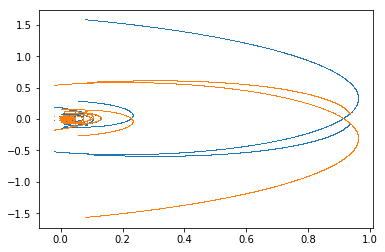

In [119]:
plt.plot(numpy.real(nyquists), numpy.imag(nyquists), ',')
plt.plot(numpy.real(nyquists), numpy.imag(numpy.conj(nyquists)),',')
# plt.xlim([-5,5])
# plt.ylim([-5,5])

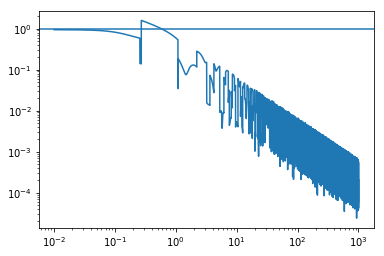

In [120]:
plt.loglog(omega, numpy.abs(nyquists))
plt.axhline(1)